# Disruption Problem (lab answers are in French)

### Instruction

You must give a Jupyter Notebook in Python/Sage/Julia (the choice is yours). The criteria by which the score is given are

the correctness of the results
the overall quality of the presentation
well-written answers to theoretical questions
comment on the code in the spirit of literate programming.
An example of what is expected is this kind of post

https://medium.com/analytics-vidhya/credit-risk-modelling-in-python-3ab4b00f6505

If you feel very inspired by a topic don’t hesitate to add some additional perspectives

### Context

Imagine that we have events we describe by a point process $N$.

At the beginning of the observation, events occur according to a Poisson process intensity $\lambda_0$ until a time $\tau$ and then switch to a new regime which is still a Poisson process but with intensity $\lambda_1$.
 
We suppose that we know $\lambda_0$ and $\lambda_1$ but not $\tau$.

We still know that $\tau$ follows an exponential distribution of parameter $\sigma$.

We want to estimate $\tau$
 by the observation of a single trajectory.

We denote by $F_t=\sigma(N(s), s≤t)$ the $\sigma$-field which contains the information given by the trajectory up to time $t$. 

We set $\hat{Z}(t)=P(\tau≤t|F_t)$

We have (or we should have) shown that
$\hat{Z}(t)=\int_0^t h(s)(1−\hat{Z}(s)) ds + \int_0^t\frac{(b−a)\hat{Z}(s^−)(1−\hat{Z}(s^−))}{\hat{λ}(s)}(dN(s)−\hat{λ}(s) ds)$

### Work

1) From the last equation, describe the dynamics of $\hat{Z}$ between its jumps and give the size of its jumps.
2) Simulate a sample path of $N$ and then the corresponding trajectory of $\hat{Z}$.
3) Suppose that $\hat{Z}$ is the true observation, what is a criterion to estimate $\tau$ ?
4) Open question : which technique(s) of data analysis could be used to answer the same question with or without the Poisson hypothesis ? To get an hint of the performance, give it a try on the Poisson situation.

### Question 1 

En utilisant $\hat{Z}(t)=\int_0^t h(s)(1−\hat{Z}(s)) ds + \int_0^t\frac{(b−a)\hat{Z}(s^−)(1−\hat{Z}(s^−))}{\hat{λ}(s)}(dN(s)−\hat{λ}(s) ds)$.

On peut voir que $\hat{Z}$ se décompose en deux parties à fixé :

- $\quad t \rightarrow \int_0^t h(s)(1−\hat{Z}(s)) ds$ , une fonction continue en t décrivant la dynamique de $\hat{Z}$ entre ces sauts

- $ \quad t  \rightarrow  \int_0^t\frac{(b−a)\hat{Z}(s^−)(1−\hat{Z}(s^−))}{\hat{λ}(s)}(dN(s)−\hat{λ}(s) ds)$ une fonction qui est d'espérance nulle et dont les sauts sont décrit par ceux de N. Les sauts de Z sont d'amplitude $\frac{(b−a)\hat{Z}(T_i^−)(1−\hat{Z}(T_i^−))}{\hat{λ}(T_i)} = \frac{(b−a)\hat{Z}(T_{i}^-)(1−\hat{Z}(T_{i}^-))}{a+(b−a)\hat{Z}(T_{i}^-)}$ aux instants de sauts $T_i$ de N.

### Question 2

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45

4.218916594077787


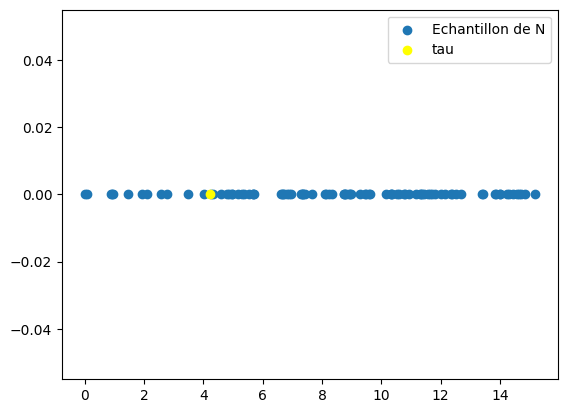

In [42]:
#Simulation du processus de poisson
t_max = 15
sigma=.2
tau = np.random.exponential(1/sigma)
print(tau)
a=2
b=8
T1=[0]
while T1[-1]<tau:
    T1.append(T1[-1]+np.random.exponential(1/a))

T2=[0]
while T2[-1]<t_max-tau:
    T2.append(T2[-1]+np.random.exponential(1/b))
T1=np.array(T1[:-1])
T2=np.array(T2[1:])+tau
T=np.concatenate((T1,T2))


plt.scatter(T, np.zeros(len(T)),label='Echantillon de N')
plt.scatter(tau,0,label='tau',c='yellow')
plt.legend()
plt.show()



On a pour $t\in [ T_n, T_{n+1}[$, $\hat{Z}(t)= \hat{Z}(T_n)+\int_{T_n}^t (h(s)-(b−a)\hat{Z}(s^−))(1−\hat{Z}(s^-))ds$ (*). 

Et $Z(T_{n+1})= Z(T_{n+1}^-) + \frac{(b−a)\hat{Z}(T_{n+1}^-)(1−\hat{Z}(T_{n+1}^-))}{a+(b−a)\hat{Z}(T_{n+1}^-)}$

De plus $ \tau \sim \mathcal{E}(\sigma) $ donc $h(s) = \frac{\sigma e^{-\sigma s}}{1-(1-e^{-\sigma s})}= \sigma$

Finalement, en, réecrivant (*): $\forall t,t' \in ] T_n, T_{n+1}[, t' \leq t,\hat{Z}(t)= \hat{Z}(t')+\int_{t'}^t (\sigma-(b−a)\hat{Z}(s^−))(1−\hat{Z}(s^-))ds$


On approximera $\int_{t'}^t (\sigma-(b−a)\hat{Z}(s^−))(1−\hat{Z}(s^-))ds$ par $(t-t')(\sigma-(b−a)\hat{Z}(t'))(1−\hat{Z}(t'))$ (méthode des rectangles). 

In [43]:
#Simulation de Z

eps= min(np.array([np.abs(T[i]-T[i-1]) for i in range(1,len(T))]+[10-2]))/10     #eps= 10-3 ou moins pour differencier les T_n
def Z_hat(eps,a,b,sigma,t_max,T):
    t=np.linspace(0,t_max,int(t_max/eps))
    Z=np.zeros(len(t))
    next_T_index=0
    for i in range(len(t)):
        if T[next_T_index]<t[i]:
            next_T_index+=1
            Z[i]+=Z[i-1]+(b-a)*Z[i-1]*(1-Z[i-1])/(a+(b-a)*Z[i-1])
        else:
            Z[i]=Z[i-1]+eps*(sigma-(b-a)*Z[i-1])*(1-Z[i-1])
    return Z

Z=Z_hat(eps,a,b,sigma,t_max,T)
        
    

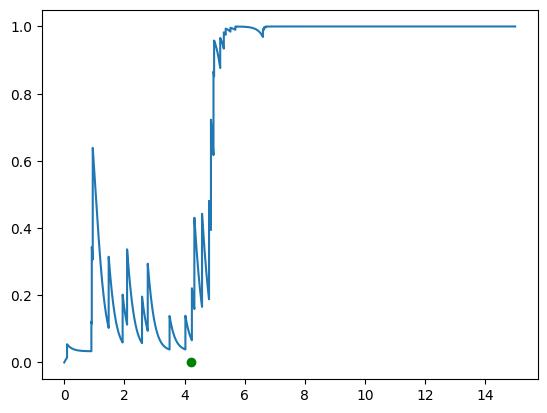

In [44]:
plt.plot(np.linspace(0,t_max,int(t_max/eps)), Z)
plt.scatter(tau, [0], c = 'green')
plt.show()

### Question 3

Si $\hat{Z}$ est notre observation dénoté $(\hat{Z}_i)_{1\leq i \leq n}$ aux temps $(t_i)_{1\leq i \leq n}$, on peut: 

- Calculer $\tau$ tel que $\sum_{i=0}^n log(\mathbb{P}(\hat{Z}_i| \tau)) $ est maximisé. Or  $\mathbb{E}[{\hat{Z(t)} | \tau} ] = \mathbb{E}[Z(t) | \mathcal{F}_t | \tau] = \mathbb{E}[Z(t) | \tau]= \mathbb{1}_{t \geq \tau} $. 

- Notre problème revient à maximiser $\sum_{i=0}^n log(1_{Z_i = 1_{t_i \geq \tau }}) $ qui admet comme unique minimum $\inf \lbrace t_i , \hat{Z}_i \geq \delta \rbrace$ avec $\delta > 0$ s'il existe (on prends $ \delta$ assez grand pour minimiser l'impact du bruit s'il existe ).

Pour notre simulation précédente au vu de l'impact des approximations successives, plus $\delta$ est petit meilleur sera notre estimation de $\tau$ mais plus le temps de calcul sera long. Il existe cependant un $\delta$ minimale à partir duquel notre estimation ne correspond plus à $\tau$ à cause du bruit.

In [45]:
def estimated_tau(Z_hat,eps,t_max, delta):
    t=np.linspace(0,t_max,int(t_max/eps))
    for i in range(len(Z_hat)):
        prop=True
        for j in range(i,len(Z_hat)):
            if Z_hat[j]<delta:
                prop=False
                break
        if prop==True:
            return t[i]
    return np.infty

delta=1/8
print('Tau estimé : ',estimated_tau(Z,eps,t_max,delta))
print('Tau réel : ',tau)

Tau estimé :  4.245604225951548
Tau réel :  4.218916594077787


### Question 4



Alors voilà l'idée que j'ai eu, d'après la remarque suivante, en écrivant notre processus comme somme de deux processus de poisson tronqué à $\tau$ fixé,
$ N(t) = N_1(t) 1_{t \leq \tau} + (N_2(t)+N_1(\tau)) 1_{t \geq \tau}$ :
- Si l'on prends $s$ et $t$ tel que $\frac s t= \frac {\lambda _1} {\lambda _2}$ alors  

$$
\mathbb{E}[N(s) - N(t)] : \left\{\begin{array}{ccl}  
\lambda _1 (s-t) & \text{si } s\leq \tau \\
\lambda _2 (s-t) & \text{si } t \geq \tau \\
(\lambda _1-\lambda _2) \tau & \text{sinon } \end{array}\right. \\
$$

On constate qu'en faisant tendre s-t vers 0, ayant une infinité de réalisation de N, on peut avoir une estimation exacte de $\tau$ (on fait parcourir à s-t $\mathbb{R}^+$ ,à distance s-t constante en selectionnant certaines réalisations de N, j'explique pourquoi après ,et dès que $\mathbb{E}[N(s) - N(t)]$ est assez grand sur un intervalle on peut calculer $\tau$).
Pour se mettre dans le même cas que précédemment, supposons n'avoir qu'une seule réalisation de N. 

En utilisant le fait qu'on obtient que les différences d'instants de saut sont indépendants on peut estimer $\mathbb{E}[N(s) - N(t)]$ comme si l'on avait eu plusieurs réalisation de variables aléatoires i.i.d de même loi que $N(s) - N(t)$ en faisant la somme  empirique de $N(s) - N(t)$ après chaque saut .

On observe que la précision de cette estimation dépend du nombre de sauts (limitation intrinsèque à mon modèle), de plus s-t ne peut être plus petit que la durée minimale entre deux saut ne doit pas être plus grand que $\tau$ sinon toute estimation est caduc.

L'idée de l'algorithme serait la suivante, connaissant les instants de saut de N :

Supposons $\lambda _1 \leq \lambda _2$, le cas contraire produisant un algorithme très similaire

- Proposer un intervalle de confiance pour $\tau$, disons $[\hat{\tau}_1,\hat{\tau}_2]$ ( la première estimation pourrait être $\frac 1 \sigma$ plus ou moins un certain $\delta$)
- Estimer $\mathbb{E}[N(s) - N(t)]$ pour $\frac s t= \frac {\lambda _1} {\lambda _2}$ et $s \leq \hat{\tau}_1$ et augmenter $\hat{\tau}_1$ si le résultat est inférieur au résultat attendu. 
- Estimer $\mathbb{E}[N(s) - N(t)]$ pour $\frac s t= \frac {\lambda _1} {\lambda _2}$ et $t \geq \hat{\tau}_2$ et diminuer $\hat{\tau}_2$ si le résultat est supérieur au résultat attendu.
- Si $\hat{\tau}_2-\hat{\tau}_1$ rempli une condition (la condition $\hat{\tau}_2-\hat{\tau}_1$ assez petit ne me parait pas bonne, mais je n'ai pas trouvé mieux), renvoyer $\frac {\mathbb{E}[N(\hat{\tau}_2) - N(\hat{\tau}_1)]} {(\lambda _1-\lambda _2)}$


Je n'ai pas vraiment trouvé mieux pour développer mon idée, étant donné que les estimations d'espérances présentées ici sont trop incertaine avec juste une réalisation de N, enfin il y a peut être des moyens plus astucieux pour faire varier $\hat{\tau}_1,\hat{\tau}_2$.

C'est pourquoi je ne proposerait pas d'implémentation